## Trabalho Implementação PNL

##### William Lucas e Nayara Gomes

In [8]:
import math
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML, display

Função e domínio:

![Função](./funcao.png)

In [9]:
def funcao(x1, x2):
    return -1 * math.exp(-1*(x1**2 + x2**2))

##### Funções auxiliares

Para calcular o gradiente, utilizamos a definição abaixo:

![Gradiente](./gradiente.png)

In [10]:
def gradiente(x1, x2):
    grad = np.array([[x1 * 2 * math.exp(-1 * (x1**2 + x2**2))], 
                   [x2 * 2 * math.exp(-1 * (x1**2 + x2**2))]])
    return grad

Para calcular a Matriz Hessiana, utilizamos a definição abaixo:

![Hessiana](./hessiana.png)

In [11]:
def matriz_hessiana(x1, x2):
    hess = np.array([[(2 - 4 * x1**2) * math.exp(-1 * (x1**2 + x2**2)),  - 4 * x1 * x2 * math.exp(-1 * (x1**2 + x2**2))],
                  [-4 * x1 * x2 * math.exp(-1 * (x1**2 + x2**2)), (2 - 4 * x2 **2) * math.exp(-1 * (x1**2 + x2**2)) ]])
    return hess

In [27]:
def e_positiva_definida(x):
    return np.all(np.linalg.eigvals(x) > 0)

True


#### 1. Comportamento da função

##### **Contínua:**
 Sim, pois não há valores para x1 e x2 fora do domínio.

##### **Convexidade:**

*Por definição, uma função é estritamente convexa quando a sua matriz Hessiana é positiva definida em todos os pontos de C e ela é convexa quando a sua matriz Hessiana é positiva semi-definida em todos os pontos de C.*

Calculando a Hessiana para x1=1 e x2=1 e verificando se f é positiva definida nesse ponto:

In [41]:
matriz_hes = matriz_hessiana(1,1)
print('Hessiana -> ', matriz_hes)
print('Autovalores -> ', np.linalg.eigvals(matriz_hes))

if e_positiva_definida(matriz_hes):
    print('É positiva definida? Sim')
else:
    print('É positiva definida? Não')


Hessiana ->  [[-0.27067057 -0.54134113]
 [-0.54134113 -0.27067057]]
Autovalores ->  [ 0.27067057 -0.8120117 ]
É positiva definida? Não


Como f não é positiva definida para o ponto dado, f não é convexa.

##### **Ponto Crítico:**
*Para encontrar o ponto crítico, basta calcular o vetor gradiente da função e igualar cada coordenada desse vetor à zero e resolver o sistema linear com as duas equações.*

Após encontrar o gradiente e resolver o sistema linear, o único ponto crítico encontrado é *f(0,0) = -1*.

##### **Mínimo local e global:**

Como visto no tópico anterior, o único ponto crítico encontrado é f(0,0) = -1, logo este ponto mínimo é global, e como não existem mais pontos mínimos, não há ponto mínimo local.

##### **Existência de Ótimo**

O teorema 6 (Weierstrass) não é utilizável para a função pois, apesar de f ser contínua, o seu conjunto não é compacto.

O teorema 7 também não é utilizável pois a função não é coerciva, visto que o limite de f para ||x1||&rarr;∞ e ||x2||&rarr;∞ é diferente de  ∞. 

Através do teorema 8 (Condição necessária de 1ª ordem) e do que foi explicado anteriormente ao encontrar o ponto crítico, temos que o ponto mínimo local x* no ponto (0,0) tem gradiente = 0, satisfazendo a condição necessária. 

Através do teorema 9 (Condição necessária de 2ª ordem), temos um minimizador local x* no ponto (0,0), onde a matriz Hessiana nesse ponto tem autovalores *a1 = a2 = 2 > 0*, satisfazendo a condição do teorema.

Por fim, através do teorema 9 (Condição suficiente de 2ª ordem), sabemos que x* = (0,0) é um ponto estácionário de f e ∇²f(x*) é definida positiva (como visto anteriormente). Logo, x* é minimizador local estrito de f.


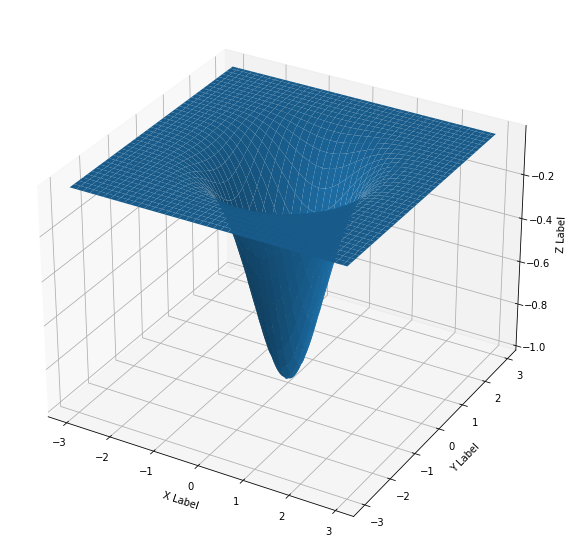

In [14]:
x = y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(x, y)

z_array = np.array([funcao(a, b) for a, b in zip(np.ravel(X), np.ravel(Y))])
Z = z_array.reshape(X.shape)

fig = plt.figure(figsize=[10.0,10.0])
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()